In [1161]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


plt.style.use('ggplot')
%matplotlib inline

In [1162]:
distr_elem_number = 25

rng = np.random.default_rng()
distribution = rng.exponential(size=distr_elem_number)
print(distribution)

[9.82076800e-01 1.91268439e+00 4.79801612e-01 1.27956477e+00
 1.45481348e-01 4.27589542e+00 2.78528531e-01 6.13611623e-01
 2.23483030e+00 9.77634420e-01 1.42667241e-03 5.81272120e-02
 1.02563853e+00 1.17827718e+00 3.22220118e-02 3.72393205e-01
 2.36362568e+00 3.15800254e-01 2.14059340e+00 1.28197131e-01
 1.20196577e+00 2.06185212e+00 3.79566074e-01 1.28890524e+00
 8.76567932e-01]


### Пункт a

In [1163]:

moda = None
if len(set(distribution)) == len(distribution):
    moda = "all elements"
else:
    distr_sorted = sorted(distribution)
    n = 1
    n_max = 1
    num = distr_sorted[0]
    for i in range(1, len(distr_sorted)):
        if distr_sorted[i] == distr_sorted[i-1]:
            n += 1
        else:
            if n >= n_max:
                num = distr_sorted
                n_max = n
            n = 1
    moda = num
print(f"Мода - {moda}")

med = np.median(distribution)
print(f"Медиана - {med}")

scope = np.max(distribution) - np.min(distribution)
print(f"Размах - {scope}")

skw = sp.stats.skew(distribution)
print(f"Коэф асимметрии - {skw}")

Мода - all elements
Медиана - 0.977634419797727
Размах - 4.274468744633269
Коэф асимметрии - 1.4027401678163125


### Пункт b

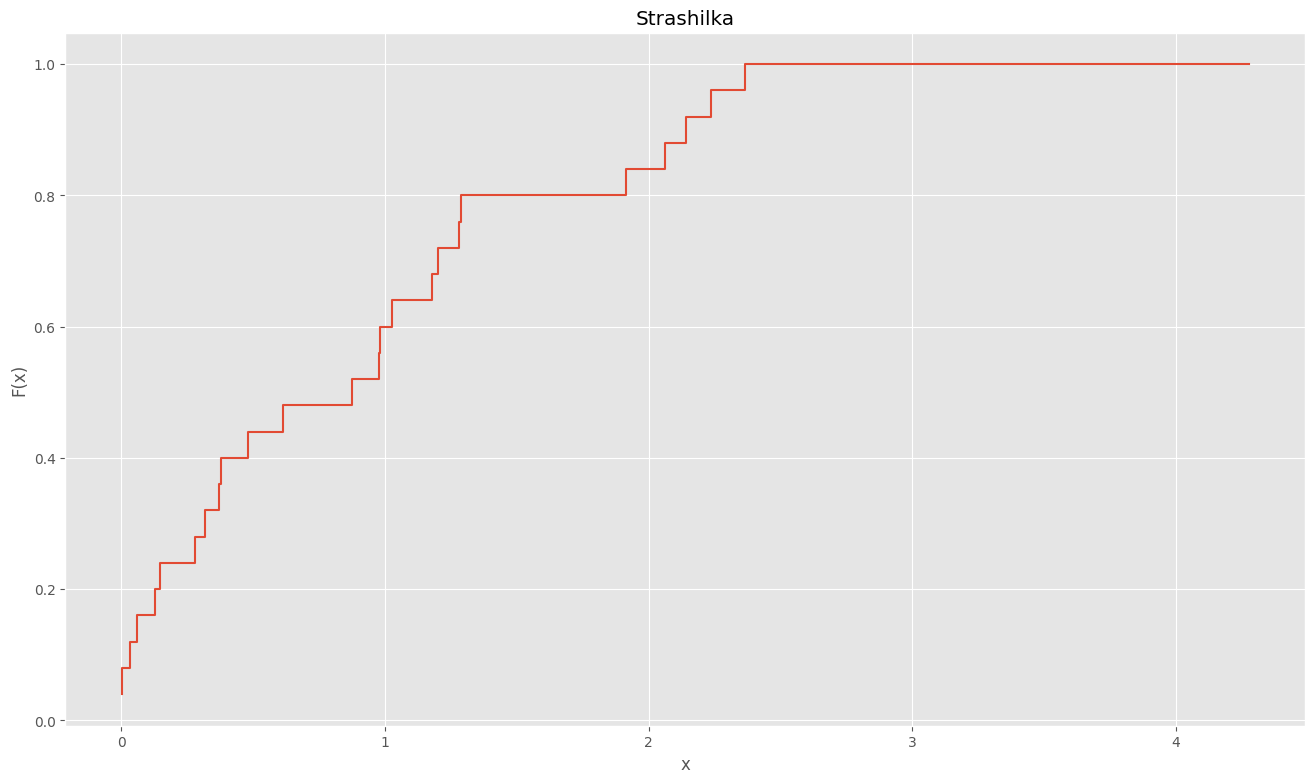

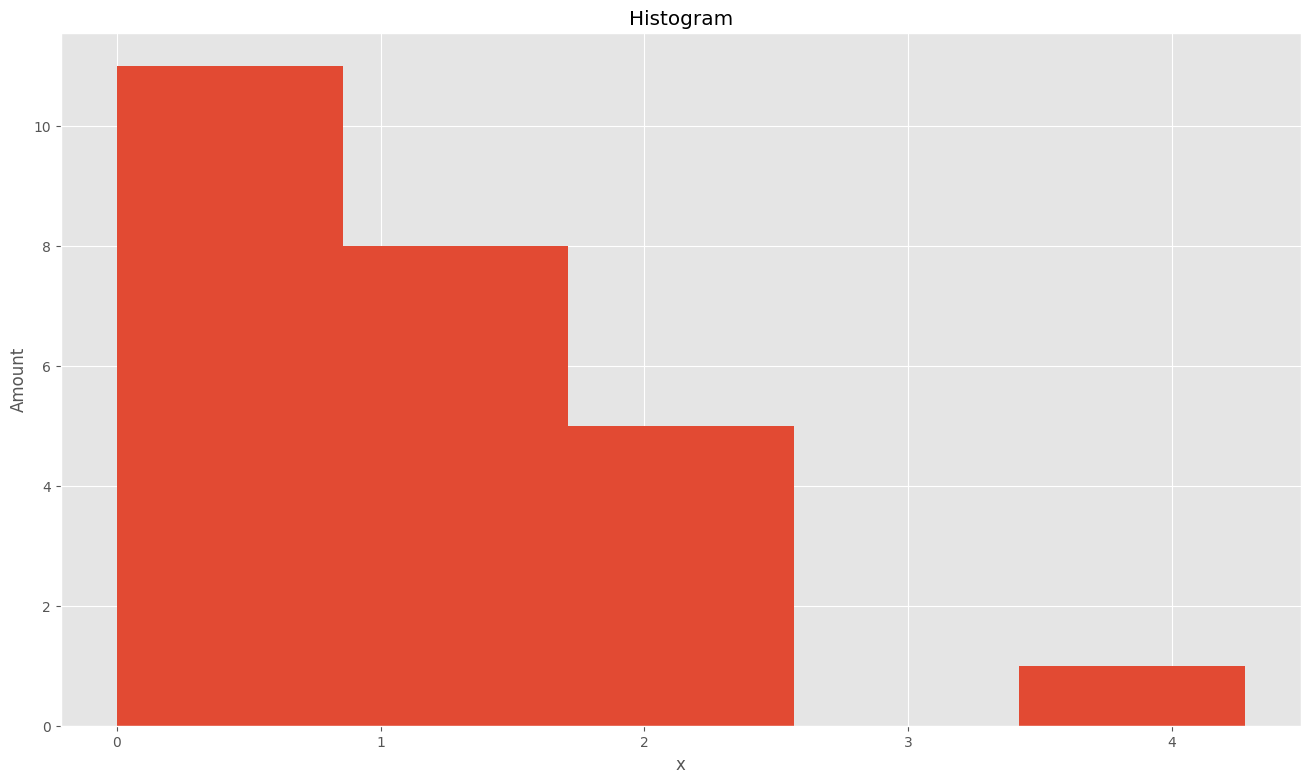

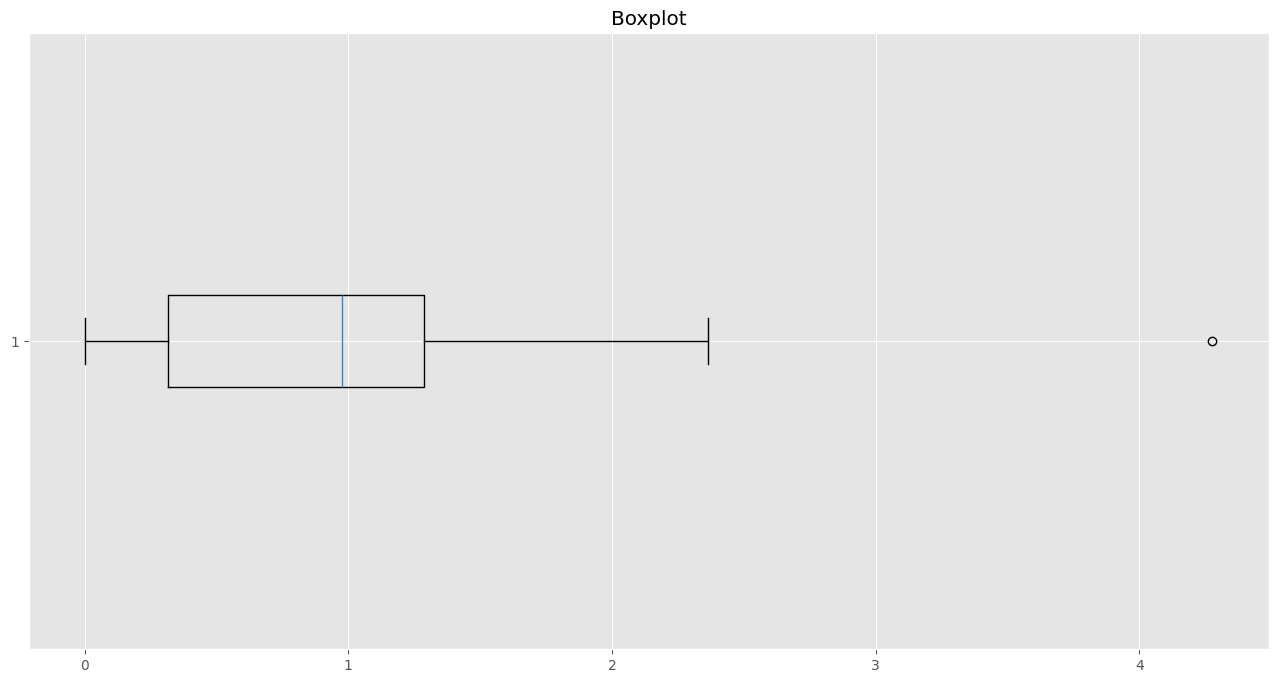

In [1164]:
# Эмпирическая функция распеределения
plt.figure(figsize=(16, 9))
plt.title("Strashilka")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.step(sorted(distribution), np.arange(1, distr_elem_number + 1) / distr_elem_number, label="F(x)",)

plt.figure(figsize=(16, 9))
plt.xlabel("x")
plt.ylabel("Amount")
plt.title("Histogram")
plt.hist(distribution, bins=int(1 + np.log2(distr_elem_number)))


plt.figure(figsize=(16, 8))
plt.title("Boxplot")
plt.boxplot(distribution, vert=False);

### Пункт C

In [1165]:
# ЦПТ
distr_avg = sp.stats.expon.expect()
distr_disp = sp.stats.expon.entropy()
sigma = distr_disp / np.sqrt(distr_elem_number)

x_val = np.linspace(distr_avg - 3 * sigma, distr_avg + 3 * sigma, 1000)
pds_val = sp.stats.norm.pdf(x_val, distr_avg, sigma)

# Бутстрап
bootstrap_distr = np.ndarray([])
for _ in range(1000):
    distr = np.mean(rng.exponential(size=distr_elem_number))
    bootstrap_distr = np.append(bootstrap_distr, distr)

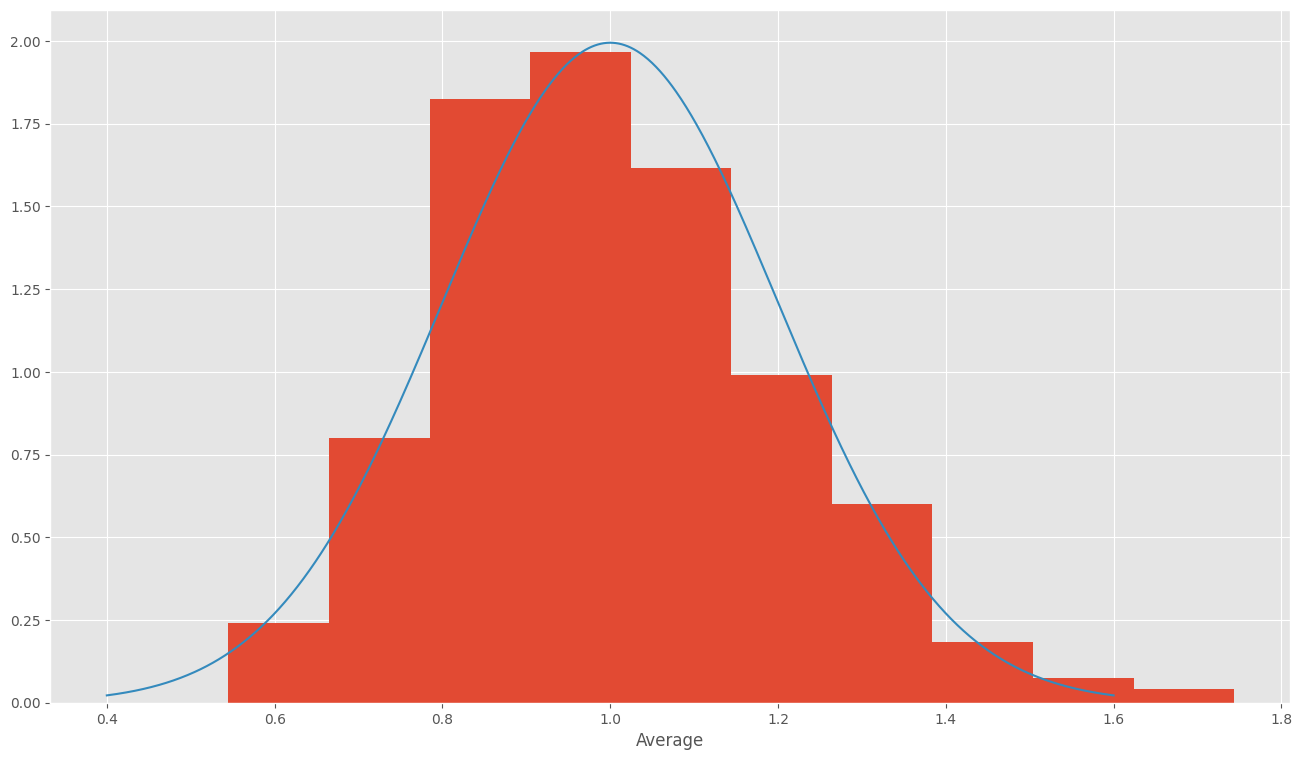

In [1166]:
plt.figure(figsize=(16, 9))
plt.xlabel("Average")
plt.hist(bootstrap_distr, density=True)
plt.plot(x_val, pds_val);

### Пункт d

In [1167]:
skew_btstrp = np.ndarray([])
for _ in range(1000):
    skw = sp.stats.skew(rng.exponential(size=distr_elem_number))
    skew_btstrp = np.append(skew_btstrp, skw)

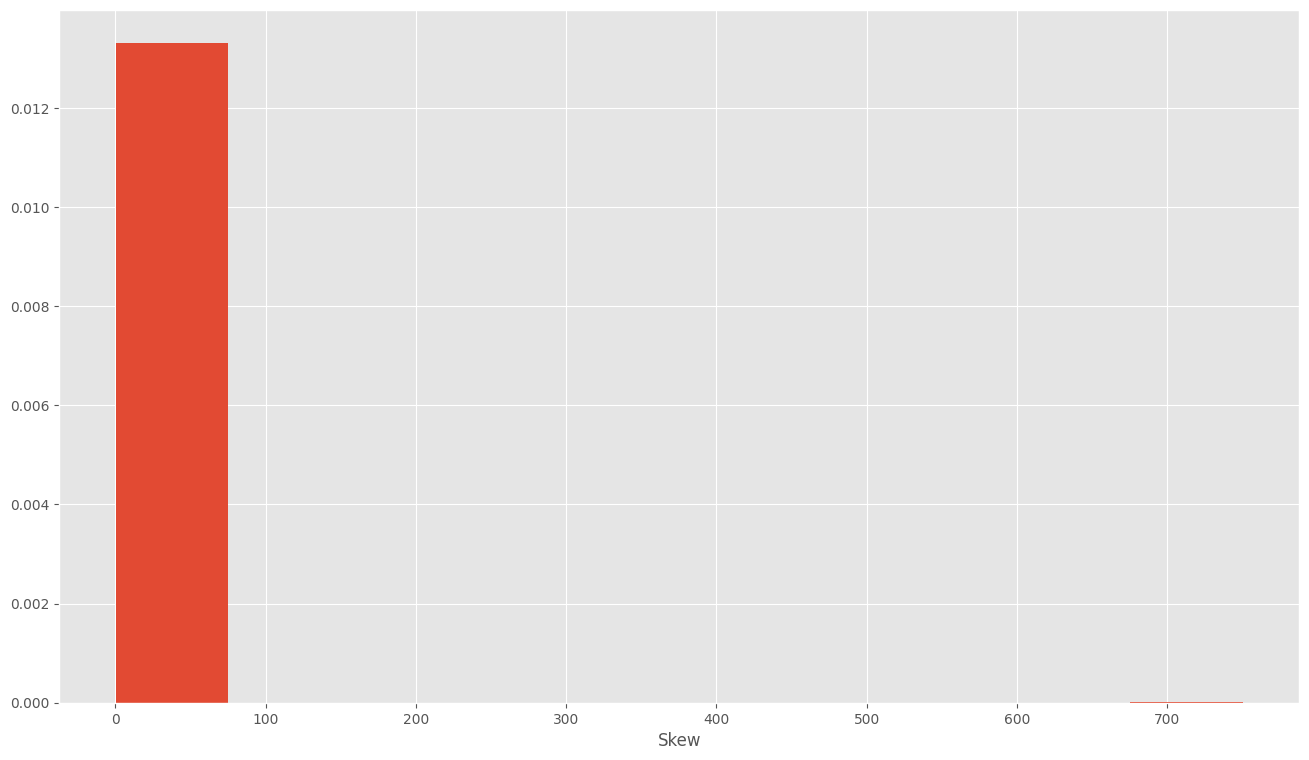

In [1168]:
plt.figure(figsize=(16, 9))
plt.xlabel("Skew")
plt.hist(skew_btstrp, density=True);

In [1169]:
prob = np.sum([1 if skew_btstrp[i] < 1 else 0 for i in range(len(skew_btstrp))]) / 1000
print(f"Вероятность, что коэффициент асимметрии < 1: {prob}")

Вероятность, что коэффициент асимметрии < 1: 0.297


### Пункт e

In [1170]:
# 
general_med = np.median(distribution)
sigma = np.std(distribution) / np.sqrt(distr_elem_number) * np.sqrt(np.pi / 2)


# Бутстрап
med_btstrp = np.ndarray([])
for _ in range(1000):
    distr = np.median(rng.exponential(size=distr_elem_number))
    med_btstrp = np.append(med_btstrp, distr)

x_val = np.linspace(min(med_btstrp), max(med_btstrp), 1000)
pdf_val = sp.stats.norm.pdf(x_val, general_med, sigma)

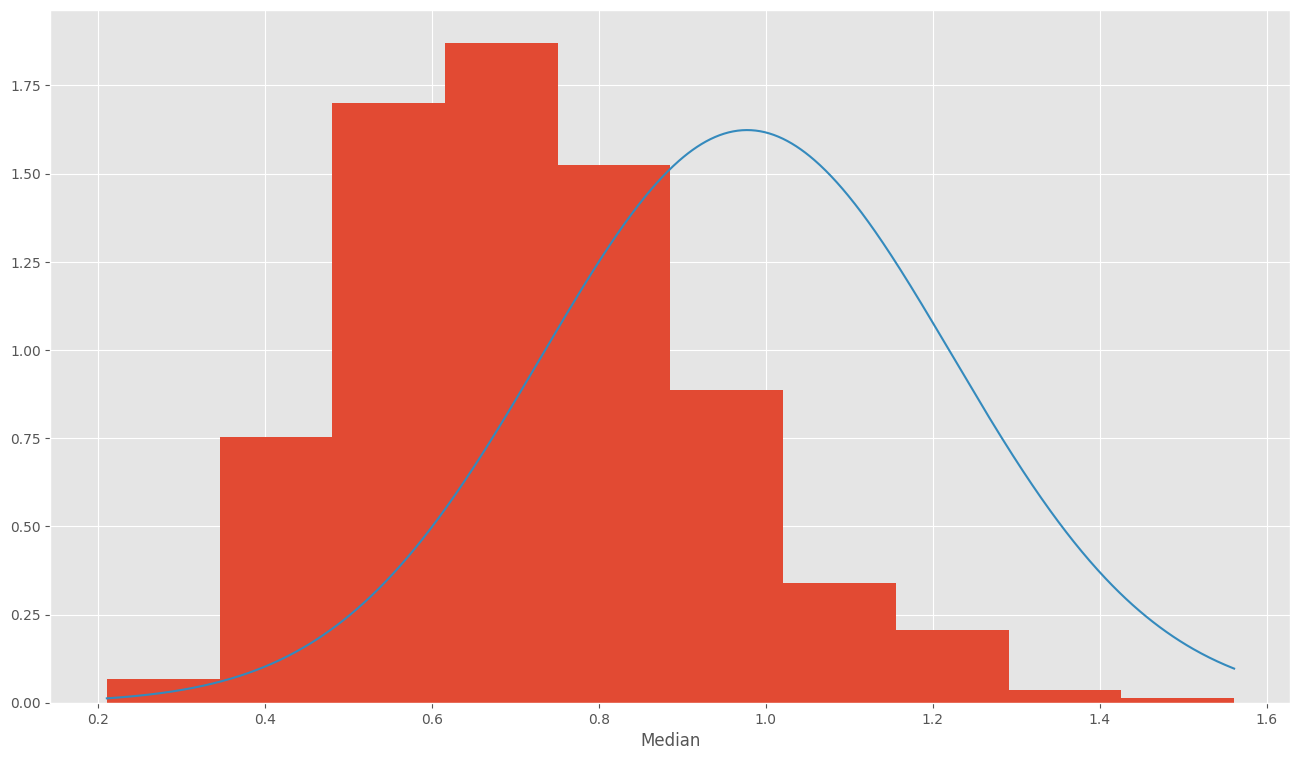

In [1171]:
plt.figure(figsize=(16, 9))
plt.xlabel("Median")
plt.hist(med_btstrp, density=True)
plt.plot(x_val, pdf_val);